# K-Nearest Neighbors Classification
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Setup

### Environment

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Load the dataset iris

In [5]:
iris = datasets.load_iris()

In [29]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
df = df[df['Species'] != 0]
df

,Sepal length,Sepal width,Petal length,Petal width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  100 non-null    float64
 1   Sepal width   100 non-null    float64
 2   Petal length  100 non-null    float64
 3   Petal width   100 non-null    float64
 4   Species       100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


### A simple visualization

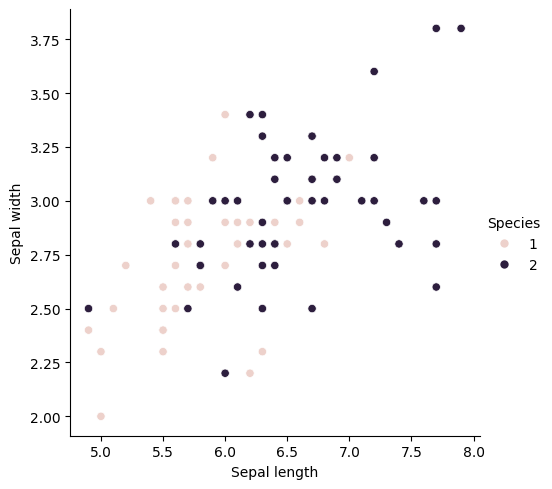

In [32]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

### Train-Test Split

In [34]:
df.columns

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Species'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:2]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [11]:
X_train[:5]

,Sepal length,Sepal width
113,5.7,2.5
117,7.7,3.8
114,5.8,2.8
55,5.7,2.8
80,5.5,2.4


### Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train[:5]

array([[-1.05155953, -1.32841092],
       [ 2.46536197,  2.76385021],
       [-0.87571345, -0.38404297],
       [-1.05155953, -0.38404297],
       [-1.40325168, -1.64320024]])

## Train your model

In [14]:
k = 1

In [15]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[16  9]
 [10 15]]
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.64      0.63        25
           2       0.62      0.60      0.61        25

    accuracy                           0.62        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.62      0.62      0.62        50

Accuracy: 0.62


La estructura básica de una matriz de confusión es la siguiente:

TN
FN
​
  
FP
TP
​


## Best k

In [18]:
def knn_tuning(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [19]:
knn_tuning(1)

0.62

In [20]:
knn_tuning(5)

0.66

In [35]:
knn_results = pd.DataFrame({'K':np.arange(1, len(X_train), 5)})
knn_results

,K
0,1
1,6
2,11
3,16
4,21
5,26
6,31
7,36
8,41
9,46


In [22]:
knn_results['K']

0     1
1     6
2    11
3    16
4    21
5    26
6    31
7    36
8    41
9    46
Name: K, dtype: int32

In [37]:
knn_results['Accuracy'] = knn_results['K'].apply(knn_tuning)
knn_results

,K,Accuracy
0,1,0.62
1,6,0.62
2,11,0.70
3,16,0.76
4,21,0.76
5,26,0.78
6,31,0.80
7,36,0.76
8,41,0.78
9,46,0.74


In [38]:
knn_results

,K,Accuracy
0,1,0.62
1,6,0.62
2,11,0.70
3,16,0.76
4,21,0.76
5,26,0.78
6,31,0.80
7,36,0.76
8,41,0.78
9,46,0.74


## Optimize weights

In [25]:
def knn_tuning_uniform(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [26]:
def knn_tuning_distance(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'distance')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [27]:
knn_results['Uniform'] = knn_results['K'].apply(knn_tuning_uniform)
knn_results['Distance'] = knn_results['K'].apply(knn_tuning_distance)
knn_results

,K,Accuracy,Uniform,Distance
0,1,0.62,0.62,0.62
1,6,0.62,0.62,0.62
2,11,0.70,0.70,0.66
3,16,0.76,0.76,0.68
4,21,0.76,0.76,0.72
5,26,0.78,0.78,0.74
6,31,0.80,0.80,0.68
7,36,0.76,0.76,0.68
8,41,0.78,0.78,0.68
9,46,0.74,0.74,0.70
